# Testando o modelo do Detector de Emoções

## Etapa 1 - Importando as bibliotecas

TensorFlow 2.x selected.


In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.19.0'

## Etapa 2 - Conectando com o Drive e acessando os arquivos

In [3]:
path = "../Material/"

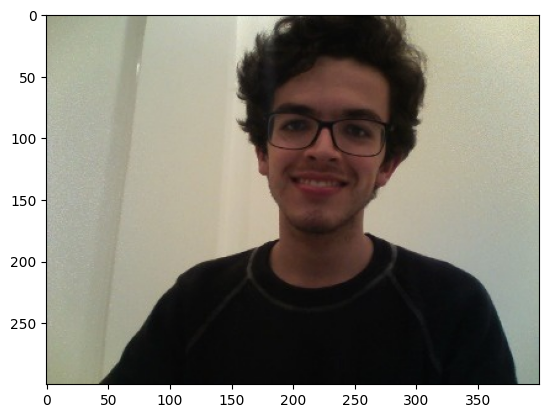

In [7]:
imagem = plt.imread('../Material/testes/teste_gabriel.png')
plt.imshow(imagem)

In [12]:
imagem.shape

(300, 400, 3)

## Testando o Detector

### Carregamento dos modelos

In [ ]:
cascade_faces = "../Material/haarcascade_frontalface_default.xml"
caminho_modelo = "../Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
# Carregando o modelo de emoções
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

### Detecção de faces

In [18]:
original = imagem.copy()
# Convert to uint8 for face detection
original_uint8 = (original * 255).astype('uint8')
faces = face_detection.detectMultiScale(original_uint8, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [19]:
faces

array([[163,  41, 124, 124]], dtype=int32)

In [20]:
len(faces)

1

In [21]:
faces.shape

(1, 4)

### Extração do ROI (region of interest)

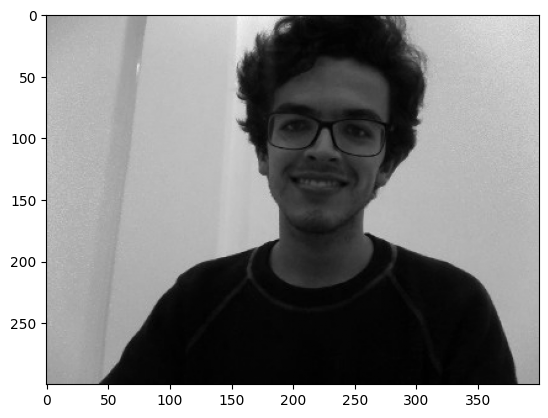

In [26]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(cinza, cmap='gray')

In [23]:
cinza.shape

(300, 400)

In [24]:
roi = cinza[40:40 + 128, 162:162 + 128]

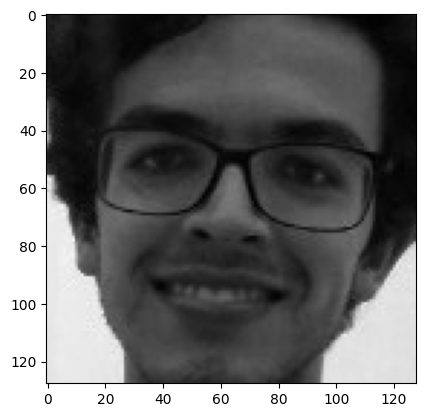

In [27]:
plt.imshow(roi, cmap='gray')

In [28]:
roi.shape

(128, 128)

In [29]:
roi

array([[0.14656472, 0.13872157, 0.10108235, ..., 0.08931765, 0.10496078,
        0.12456863],
       [0.12695687, 0.11911373, 0.08931765, ..., 0.08539608, 0.08535294,
        0.10496078],
       [0.11519216, 0.1230353 , 0.1112706 , ..., 0.08147451, 0.07706275,
        0.09274902],
       ...,
       [0.6948706 , 0.69879216, 0.7027137 , ..., 0.68673337, 0.69065493,
        0.69065493],
       [0.6948706 , 0.69879216, 0.7027137 , ..., 0.6828118 , 0.69065493,
        0.68673337],
       [0.6948706 , 0.69879216, 0.70663536, ..., 0.68673337, 0.69065493,
        0.68673337]], dtype=float32)

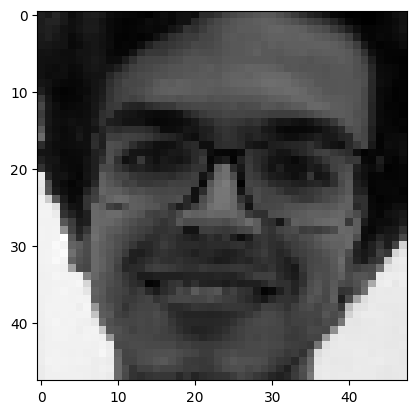

In [30]:
roi = cv2.resize(roi, (48, 48))
plt.imshow(roi, cmap='gray')

In [31]:
roi.dtype

dtype('float32')

In [32]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [33]:
roi

array([[0.12368889, 0.10545099, 0.14373246, ..., 0.05823018, 0.07965294,
        0.09188889],
       [0.11747974, 0.13558824, 0.13774118, ..., 0.05953072, 0.06977942,
        0.08869281],
       [0.11976732, 0.1321889 , 0.1169866 , ..., 0.06146013, 0.07428497,
        0.09347756],
       ...,
       [0.70386058, 0.71878433, 0.71682358, ..., 0.6911996 , 0.69273502,
        0.68607974],
       [0.69846535, 0.71231574, 0.71682358, ..., 0.68477261, 0.68915784,
        0.68804049],
       [0.69813854, 0.71088374, 0.71224838, ..., 0.68346542, 0.68738699,
        0.69000131]])

In [34]:
roi = roi / 255

In [35]:
roi

array([[0.00048505, 0.00041353, 0.00056366, ..., 0.00022835, 0.00031236,
        0.00036035],
       [0.0004607 , 0.00053172, 0.00054016, ..., 0.00023345, 0.00027364,
        0.00034781],
       [0.00046968, 0.00051839, 0.00045877, ..., 0.00024102, 0.00029131,
        0.00036658],
       ...,
       [0.00276024, 0.00281876, 0.00281107, ..., 0.00271059, 0.00271661,
        0.00269051],
       [0.00273908, 0.0027934 , 0.00281107, ..., 0.00268538, 0.00270258,
        0.0026982 ],
       [0.0027378 , 0.00278778, 0.00279313, ..., 0.00268026, 0.00269564,
        0.00270589]])

In [36]:
roi = img_to_array(roi)

In [37]:
roi

array([[[0.00048505],
        [0.00041353],
        [0.00056366],
        ...,
        [0.00022835],
        [0.00031236],
        [0.00036035]],

       [[0.0004607 ],
        [0.00053172],
        [0.00054016],
        ...,
        [0.00023345],
        [0.00027364],
        [0.00034781]],

       [[0.00046968],
        [0.00051839],
        [0.00045877],
        ...,
        [0.00024102],
        [0.00029131],
        [0.00036658]],

       ...,

       [[0.00276024],
        [0.00281876],
        [0.00281107],
        ...,
        [0.00271059],
        [0.00271661],
        [0.00269051]],

       [[0.00273908],
        [0.00279339],
        [0.00281107],
        ...,
        [0.00268538],
        [0.00270258],
        [0.0026982 ]],

       [[0.0027378 ],
        [0.00278778],
        [0.00279313],
        ...,
        [0.00268026],
        [0.00269564],
        [0.00270589]]], dtype=float32)

In [38]:
roi.shape

(48, 48, 1)

In [39]:
roi = np.expand_dims(roi, axis = 0)

In [40]:
roi.shape

(1, 48, 48, 1)

### Previsões

In [ ]:
preds = classificador_emocoes.predict(roi)[0]

In [ ]:
preds

array([1.6802111e-05, 5.7679777e-09, 1.1206568e-05, 9.9066460e-01,
       1.8033772e-05, 1.8518280e-05, 9.2708217e-03], dtype=float32)

In [ ]:
len(preds)

7

In [ ]:
emotion_probability = np.max(preds)
emotion_probability

0.9906646

In [ ]:
preds.argmax()

3

In [ ]:
label = expressoes[preds.argmax()]
label

'Feliz'

### Resultados

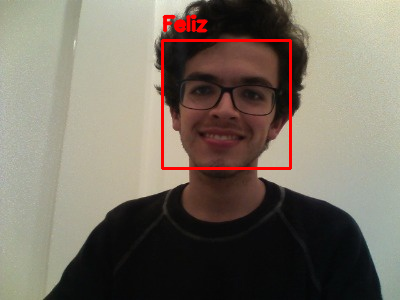

In [ ]:
cv2.putText(original, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(original)

In [ ]:
probabilidades = np.ones((250,300,3), dtype= 'uint8') * 255
probabilidades

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
probabilidades.shape

(250, 300, 3)

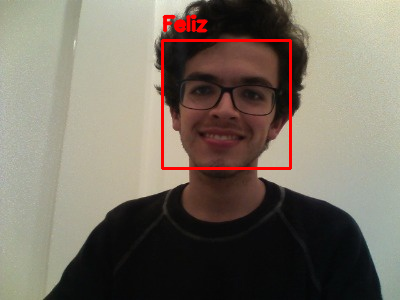

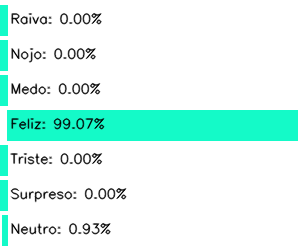

In [ ]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)